## Assignment №5

##### Author: [Radoslav Neychev](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import FashionMNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Task #1: 
Let's revisit the handwritten digit recognition problem we covered before. We will be working with the [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. For this task, we will use the entire dataset as a whole.

Your main task is to implement the entire model training pipeline and achieve an accuracy of $\geq 88.5\%$ on the test set.

The code for training the model is missing in this task. There are only a few tests that will help you debug your solution. For an example, you can refer to the notebooks from previous lessons.

In [44]:
# do not change the code in the block below
# __________start of block__________
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# __________end of block__________

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extens

Text(0.5, 1.0, 'Image label: 7')

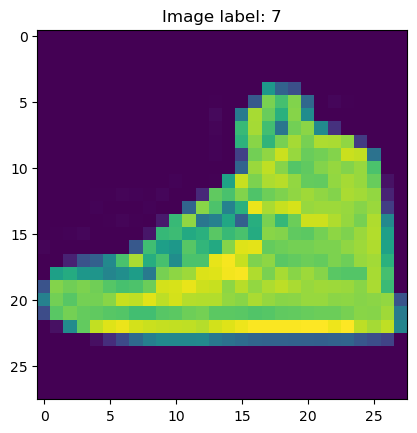

In [45]:
# do not change the code in the block below
# __________start of block__________

train_fmnist_data = FashionMNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_fmnist_data = FashionMNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_fmnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

Build the model below. Please do not build an overly complicated network; it should not be deeper than four layers (it can be fewer). Your main task is to train the model and achieve at least 88.5% accuracy on the test set (hold-out set).

__Note, your model should be represented by the variable `model`. It should take a batch of input tensors of dimension (1, 28, 28).__

In [46]:
# Creating model instance
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(32*14*14, 10)
)

Do not forget to move your model to the `device`!

In [47]:
model.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=6272, out_features=10, bias=True)
)

Local tests are coming next:

In [48]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, "Please, use `model` variable to store your model"

try:
    x = random_batch[0].to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Train the model on the training set. Also we recommend you to vary the `learning rate`.

In [49]:
opt = torch.optim.Adam(model.parameters(), lr=0.003)
loss_function = nn.CrossEntropyLoss()

train_size = 80
test_size = 20
epochs = 20

In [50]:
def train_model(model, opt, train_data_loader, test_data_loader, loss_function, train_size, test_size):
    train_loss = []
    test_loss = []
    test_accuracy = []

    for epoch in range(epochs):
        epoch_train_loss = []
        epoch_test_loss = []
        epoch_test_accuracy = []
        train_batch_idx = 0
        test_batch_idx = 0

        model.train(True)
        for x_batch, y_batch in train_data_loader:
            if train_batch_idx > train_size:
                break
            train_batch_idx += 1
            x_batch = x_batch.to(device, dtype=torch.float32)
            y_batch = y_batch.to(device, dtype=torch.long)

            pred = model(x_batch)
            loss = loss_function(pred, y_batch)

            opt.zero_grad()
            loss.backward()

            opt.step()
            epoch_train_loss.append(loss.item())

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in test_data_loader:
                if test_batch_idx > test_size:
                    break
                test_batch_idx += 1
                x_batch = x_batch.to(device, dtype=torch.float32)
                y_batch = y_batch.to(device, dtype=torch.long)

                pred = model(x_batch)
                loss = loss_function(pred, y_batch)

                epoch_test_loss.append(loss.item())
                y_pred = pred.argmax(dim=1)
                epoch_test_accuracy.append((y_pred == y_batch).float().mean().item())

        print(f'Epoch {epoch + 1} of {epochs}')
        train_loss.append(np.mean(epoch_train_loss))
        test_loss.append(np.mean(epoch_test_loss))
        test_accuracy.append(np.mean(epoch_test_accuracy))

        print(f'Train loss: {train_loss[-1]}')
        print(f'Test loss: {test_loss[-1]}')
        print(f'Test accuracy: {test_accuracy[-1]}')

        clear_output(True)
        plt.plot(train_loss, label='train')
        plt.plot(test_loss, label='test')
        plt.legend()
        plt.show()
    return train_loss, test_loss, test_accuracy

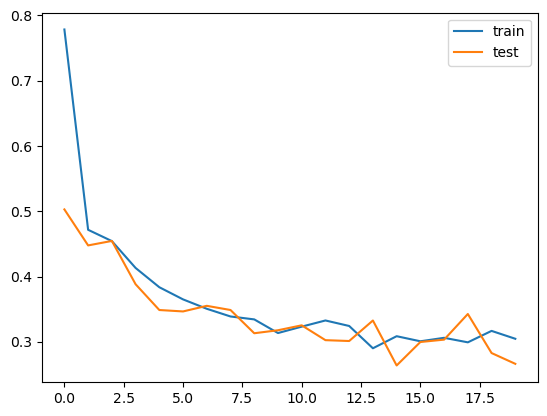

In [51]:
out = train_model(model, opt, train_data_loader, test_data_loader, loss_function, train_size, test_size)

Also, remember that you can always refer to the excellent [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/).

Let's evaluate the classification quality:

In [52]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].to(device))
        predicted_labels.append(y_predicted.argmax(dim=1).cpu())
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extens

In [53]:
print(f"Neural network accuracy on train set: {train_acc:3.5}")

Neural network accuracy on train set: 0.90615


In [54]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].to(device))
        predicted_labels.append(y_predicted.argmax(dim=1).cpu())
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extens

In [55]:
print(f"Neural network accuracy on test set: {test_acc:3.5}")

Neural network accuracy on test set: 0.8874


Check that the necessary thresholds are passed:

In [56]:
assert test_acc >= 0.885, "Train accuracy is below 0.885 threshold"
assert (
    train_acc >= 0.905
), "Test accuracy is below 0.905 while test accuracy is fine. We recommend to check your model and data flow"

### Submitting the Assignment
Upload the file `hw10_data_dict.npy` (link is on the assignment page) and run the code below to generate your submission.

In [62]:
!wget https://github.com/girafe-ai/ml-course/raw/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy

--2024-02-21 05:54:16--  https://github.com/girafe-ai/ml-course/raw/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy [following]
--2024-02-21 05:54:16--  https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272446 (6.0M) [application/octet-stream]
Saving to: ‘hw10_data_dict.npy’

hw10_data_dict.npy  100%[===================>]   5.98M  8.70MB/s    in 0.7s    

20

In [60]:
# do not change the code in the block below
# __________start of block__________
import os
import json


assert os.path.exists(
    "hw10_data_dict.npy"
), "Please, download `hw10_data_dict.npy` and place it in the working directory"


def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ",".join([str(x) for x in list(predicted_labels)])
    return predicted_labels


loaded_data_dict = np.load("hw10_data_dict.npy", allow_pickle=True)

submission_dict = {
    "train": get_predictions(
        model, torch.FloatTensor(loaded_data_dict.item()["train"])
    ),
    "test": get_predictions(model, torch.FloatTensor(loaded_data_dict.item()["test"])),
}

with open("submission_dict_hw05.json", "w") as iofile:
    json.dump(submission_dict, iofile)
print("File saved to `submission_dict_hw05.json`")
# __________end of block__________

File saved to `submission_dict_hw05.json`


With that, the task is complete. Congratulations!